# Мещерякова Ксения, 932003


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score

### Датасет содержит данные, относящиеся к образцам красного Винью-Верде с севера Португалии

In [2]:
#открываем файл с данными и выводим на экран
data = pd.read_csv("winequality-red.csv", sep=";", index_col = 0)
data=data.reset_index()
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
#Выводим первые 5 записей
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
#Выводим последние 5 записей
data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [5]:
#Описание данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Метод data.info() выводит информацию о данных: названия столбцов, количество ненулевых значений, тип данных и использование памяти. В данном датасете нет нулевых значений, у всех столбцов тип данных числовой(float), за исключением "quality" (у данного столца тип данных числовой(int))

In [6]:
#Статистика данных
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Метод data.describe() для числовых данных включает: 
* count - количество значений
* mean - среднее значение
* std - среднеквадратичное отклонение
* min - минимальное значение
* max - максимальное значение
* нижний(25) процентиль
* средний(50) процентиль
* верхний(75) процентиль

In [7]:
# Проверим данные на количество пропущенных значений
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [16]:
# Выбор признаков для анализа
selected_features = ['fixed acidity', 'volatile acidity', 'citric acid', 
                     'residual sugar', 'chlorides', 'free sulfur dioxide',
                     'total sulfur dioxide', 'density', 'pH', 'sulphates',
                     'alcohol', 'quality']

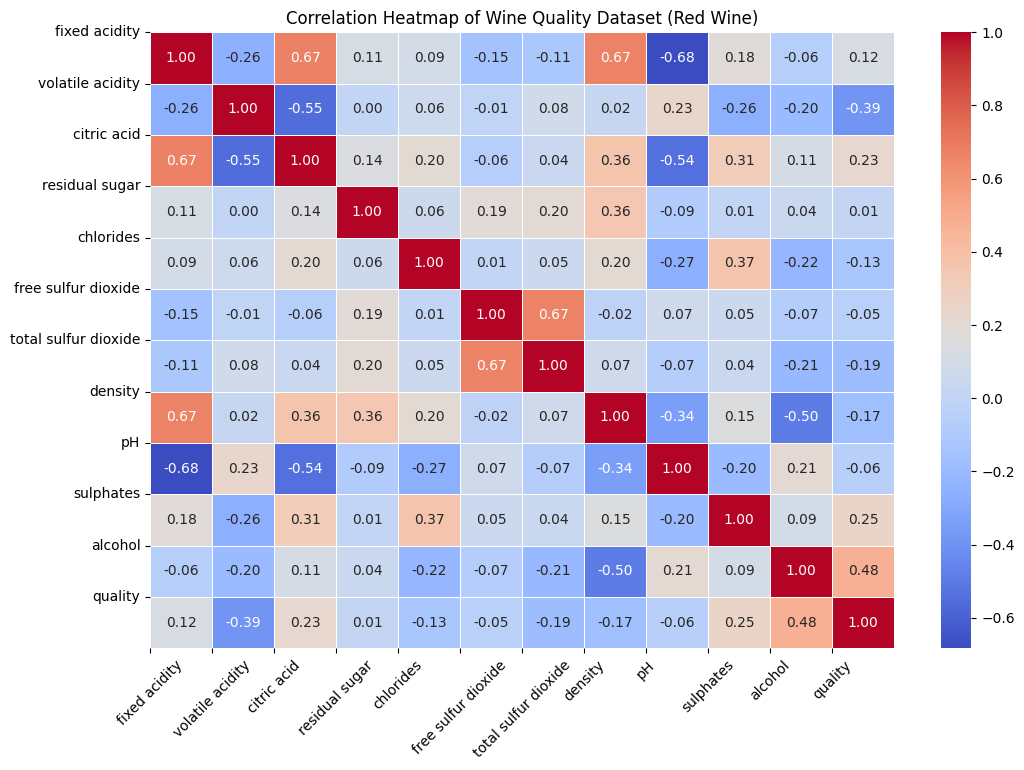

In [17]:
# Создание подмножества данных только с выбранными признаками
subset_data = data[selected_features]

# Рассчитываем корреляцию между признаками
correlation_matrix = subset_data.corr()

# Настройка параметров графика
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Добавление названий признаков на оси X и Y
plt.xticks(range(len(selected_features)), selected_features, rotation=45)
plt.yticks(range(len(selected_features)), selected_features, rotation=0)

# Отображение корреляционной тепловой карты
plt.title('Correlation Heatmap of Wine Quality Dataset (Red Wine)')
plt.show()

In [53]:
# Выбираем два произвольных численных признака для кластеризации
features = ['alcohol', 'pH']
X = data[features]

In [54]:
# Приводим признаки к стандартному масштабу
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

c:\users\ksenia\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\users\ksenia\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\users\ksenia\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\users\ksenia\appdata\local\programs\python\python39\lib\site-packages\sklearn\clus

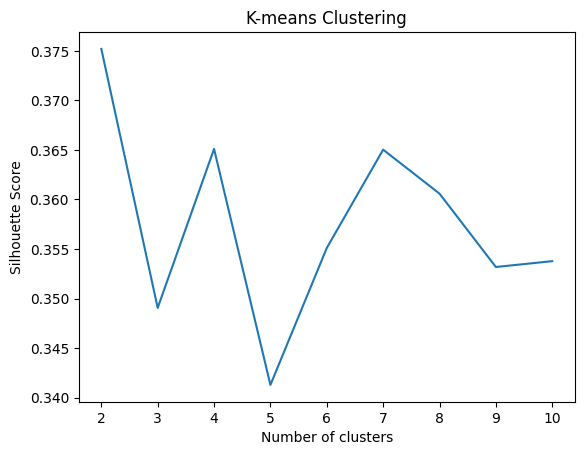

In [55]:
# Определение оптимального количества кластеров для K-means
k_values = range(2, 11)
kmeans_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    kmeans_scores.append(silhouette_score(X_scaled, kmeans.labels_))

plt.plot(k_values, kmeans_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('K-means Clustering')
plt.show()

На основе этого графикай можно выбрать оптимальное количество кластеров для использования в анализе данных, а также избежать переобучения модели при выборе слишком большого количества кластеров.
* При возрастании кривой: Увеличение значения коэффициента силуэта при увеличении количества кластеров может указывать на улучшение разделения кластеров. 
* При убывании кривой: Уменьшение значения коэффициента силуэта при дальнейшем увеличении количества кластеров может указывать на ухудшение разделения кластеров. Это может свидетельствовать о том, что большее количество кластеров приводит к менее информативным и более разреженным кластерам.
*  Если график достигает максимального значения коэффициента силуэта при определенном количестве кластеров, это оптимальное количество для данного набора данных. Следовательно, оптимальное количество кластеров = 2

In [56]:
# Выбираем оптимальное количество кластеров для K-means
best_k = k_values[kmeans_scores.index(max(kmeans_scores))]
print(f"The best number of clusters for K-means is {best_k}")

The best number of clusters for K-means is 2


In [57]:
# K-means clustering с оптимальным количеством кластеров
kmeans = KMeans(n_clusters=best_k, random_state=0)
kmeans.fit(X_scaled)

c:\users\ksenia\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2, random_state=0)

In [58]:
# Аггломеративная кластеризация
agg_clusters = AgglomerativeClustering(n_clusters=best_k)
agg_clusters.fit(X_scaled)

AgglomerativeClustering()

In [59]:
# DBScan clustering
db_clusters = DBSCAN(eps=0.3, min_samples=5)
db_clusters.fit(X_scaled)

DBSCAN(eps=0.3)

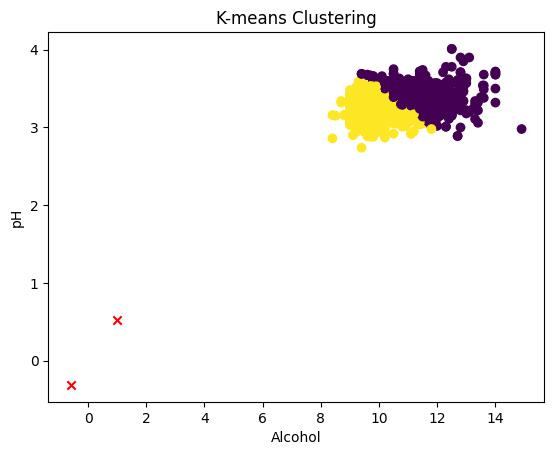

In [60]:
# Визуализация кластеров и центроидов (K-means)
plt.scatter(X['alcohol'], X['pH'], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')
plt.xlabel('Alcohol')
plt.ylabel('pH')
plt.title('K-means Clustering')
plt.show()

Исходя из этого графика, можно оценить эффективность кластеризации и увидеть, насколько хорошо центроиды представляют каждый кластер.

График отображает разделение точек данных на кластеры, обозначенные различными цветами в зависимости от принадлежности к кластеру, к которому они относятся.

Красные "x" обозначают центроиды кластеров, которые представляют собой средние значения признаков внутри каждого кластера.

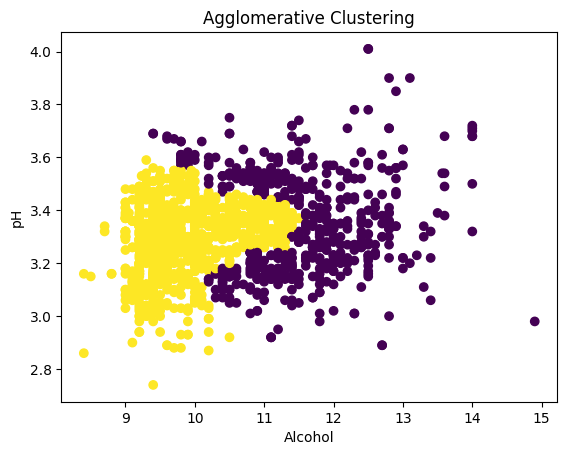

In [61]:
# Визуализация кластеров (Agglomerative Clustering)
plt.scatter(X['alcohol'], X['pH'], c=agg_clusters.labels_)
plt.xlabel('Alcohol')
plt.ylabel('pH')
plt.title('Agglomerative Clustering')
plt.show()

На графике отображены результаты агломеративной кластеризации для признаков "Alcohol" и "pH". Точки данных раскрашены в разные цвета в зависимости от принадлежности к кластеру, к которому они относятся.

Точки образуют явно выделенные кластеры с хорошо различимыми группами, это может указывать на то, что агломеративная кластеризация была эффективной в выделении групп в исходных данных.

Видимое разделение точек на кластеры с разными цветами говорит о том, что алгоритм смог успешно выделить различные группы в данных.

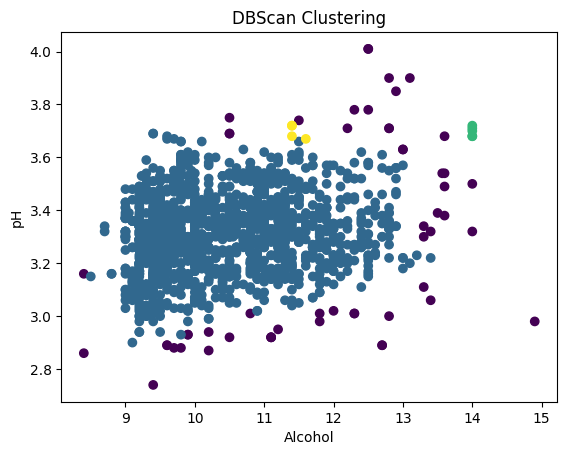

In [28]:
# Визуализация кластеров (DBScan)
plt.scatter(X['alcohol'], X['pH'], c=db_clusters.labels_)
plt.xlabel('Alcohol')
plt.ylabel('pH')
plt.title('DBScan Clustering')
plt.show()

Точки данных четко разделены на различные кластеры разными цветами, это указывает на то, что DBScan эффективно выделил кластеры на основе их плотности.

Также есть точки данных, которые не попали в кластеры из-за недостаточной плотности или находят некотором другом минимальном расстоянии от других точек. Их можно интерпретировать, как выбросы или шумовые данные, которые DBScan не смог учесть в основных кластерах из-за их плотности или распределения в пространстве признаков.

In [29]:
# Вывод гиперпараметров (K-means)
print(f"K-means hyperparameters: Number of clusters = {best_k}")

K-means hyperparameters: Number of clusters = 2


In [30]:
# Вывод гиперпараметров (Agglomerative Clustering)
print("Agglomerative Clustering hyperparameters: Number of clusters =", best_k)

Agglomerative Clustering hyperparameters: Number of clusters = 2


In [31]:
# Вывод гиперпараметров (DBScan)
print("DBScan hyperparameters: eps = 0.3, min_samples = 5")

DBScan hyperparameters: eps = 0.3, min_samples = 5


In [32]:
agg_score = silhouette_score(X_scaled, agg_clusters.labels_)
db_score = silhouette_score(X_scaled, db_clusters.labels_)

print(f"Silhouette Score for Agglomerative Clustering: {agg_score}")
print(f"Silhouette Score for DBScan: {db_score}")

Silhouette Score for Agglomerative Clustering: 0.3372832372034994
Silhouette Score for DBScan: 0.33836462128431116


Визуализация силуэтных оценок для аггломеративной кластеризации и DBScan:
* Silhouette Score for Agglomerative Clustering: 0.337 Это указывает на то, что при использовании агломеративной кластеризации значение коэффициента силуэта составляет 0.337, что говорит о среднем уровне разделения кластеров. Значение, близкое к 0.3, обычно интерпретируется как разумное разделение кластеров.
* Silhouette Score for DBScan: 0.338 Для DBScan значение равно 0.338. Это также говорит о среднем уровне разделения кластеров при использовании DBScan.

In [33]:
best_eps = 0.3
best_min_samples = 5

print(f"Agglomerative Clustering hyperparameters: Number of clusters = {best_k}")
print(f"DBScan hyperparameters: eps = {best_eps}, min_samples = {best_min_samples}")

Agglomerative Clustering hyperparameters: Number of clusters = 2
DBScan hyperparameters: eps = 0.3, min_samples = 5


* Agglomerative Clustering hyperparameters: Number of clusters = 2 Это означает, что оптимальное количество кластеров для агломеративной кластеризации, подобранное на основе выбранных гиперпараметров, составляет 2. Таким образом, данные были разделены на два кластера на основе выбранных критериев.
* DBScan hyperparameters: eps = 0.3, min_samples = 5 Для метода DBScan выбраны следующие гиперпараметры: значение eps (радиус окрестности) равно 0.3, а минимальное количество точек в окрестности (min_samples) составляет 5. Эти параметры используются для определения кластеров на основе плотности данных.

In [39]:
cluster_counts = pd.Series(kmeans.labels_).value_counts()
cluster_means = X.groupby(kmeans.labels_).mean()
print("Number of Clusters in K-means:", len(cluster_counts))
print("Cluster Means in K-means:")
print(cluster_means)

Number of Clusters in K-means: 2
Cluster Means in K-means:
     alcohol        pH
0  11.482418  3.390998
1   9.784987  3.263006


Вывод общего количества кластеров, среднего значения алкоголя и pH для каждого кластера в K-means:
Number of Clusters in K-means: 2 Это указывает, что алгоритм K-means выделил 2 кластера в вашем наборе данных.

Cluster Means in K-means: Кластерные средние (Cluster Means) представляют значения признаков для каждого кластера.
* Кластер 0 имеет среднее содержание алкоголя 11.48 и средний уровень pH 3.39.
* Кластер 1 имеет среднее содержание алкоголя 9.78 и средний уровень pH 3.26.

Эти результаты позволяют сказать, что данные были разделены на два кластера методом K-means, и кажый кластер имеет свои характеристики в виде средних значений признаков.

### Вывод
Исходя из полученных результатов, можно сделать вывод, что все три алгоритма кластеризации (K-means, агломеративная кластеризация, DBScan) продемонстрировали свою эффективность в разделении данных на кластеры на основе выбранных признаков. Однако, учитывая лучшие значения Silhouette Score и визуальное разделение кластеров, можно предположить, что K-means является наилучшим среди них в данном случае.

Таким образом, лучшее сочетание алгоритма и гиперпараметров для данной задачи - это K-means с оптимальным количеством кластеров, равным 2.